In [13]:
# Manage DataFrames
import pandas as pd

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb

# Normalize
from sklearn.preprocessing import StandardScaler

# Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Exercise2BusData.csv")
df_optional = pd.read_csv("Exercise2Optional.csv")

In [3]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)
df.head(9)

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,-23,0,39,-4,28.641509
1,168,0,39,181,27.880597
2,231,0,39,244,27.852941
3,150,17,39,143,27.826087
4,965,35,51,947,42.029412
5,33,19,46,30,38.970588
6,75,26,46,63,38.840580
7,58,15,46,52,34.059701
8,904,35,46,888,34.102941


In [4]:
df_optional = df_optional.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)
df_optional.head(5)

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,69,0,82,33,99.925373
1,35,0,82,52,100.191176
2,7,0,82,10,99.681159
3,74,15,82,27,99.385714
4,-3,0,109,17,116.298507


In [5]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

model = LinearRegression()
cross_val_score(model, x, y, cv=5).mean()

0.9938634029704166

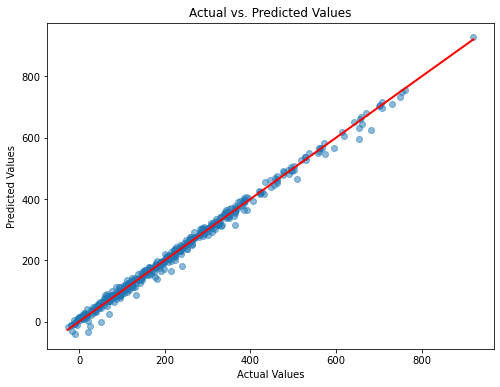

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', lw=2)

# Show the plot
plt.show()

In [7]:




mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.654193995146551
Mean Squared Error: 176.37353876761952
R-squared: 0.9940853862137997


# SVM 

In [8]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.0

[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.2s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.1s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.0s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.1s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.1s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.1s
[CV] END .......................C=1, epsilon=10, kernel=poly; total time=   0.1s
[CV] END .......................C=1, epsilon=10, kernel=poly; total time=   0.1s
[CV] END .......................C=1, epsilon=10, kernel=poly; total time=   0.1s
[CV] END ...................

In [9]:
# Create an SVR model with the best parameters from the grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(best_svr, x , y, cv=5, verbose=2).mean()
print(cv_scores)

    
best_svr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  23.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.6s remaining:    0.0s


[CV] END .................................................... total time=  29.1s
[CV] END .................................................... total time=  59.0s
[CV] END .................................................... total time=  32.3s
[CV] END .................................................... total time=  33.2s
0.9938052308412473


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished


SVR(C=10, epsilon=10, kernel='linear')

In [10]:
y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
     


Mean Absolute Error: 9.462433302459806
Mean Squared Error: 175.64679314823678
R-squared: 0.9941097573280241


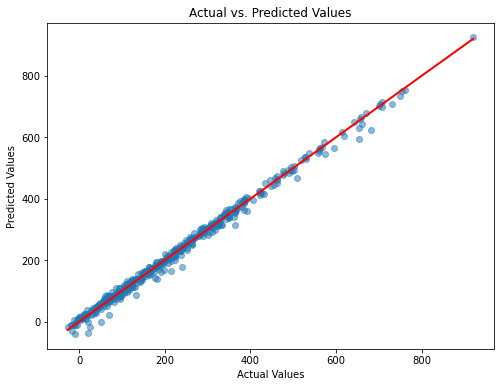

In [12]:


# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', lw=2)

# Show the plot
plt.show()
     
